<a href="https://colab.research.google.com/github/paulacanuto/IA_25_P01_G06/blob/main/Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Grupo2
# Ana Silva
# Ricardo Azevedo
# Paulo Lima
# Carolina Silva

# Análise de Dados e Tomada de Decisão

Este notebook está dividido em várias partes:
- **Parte 1:** Kaggle dataset implementando e seguindo as fases da metodologia CRISP-DM.  
- **Parte 2:** Ficha 1
  - Módulo 1 - Fundamentos da Cultura Orientada aos Dados.  
  - Módulo 2 - Preparação de Dados.
  - Módulo 3 - Análise Exploratória de Dados (AED)

---
---


# Parte 1
# Metodologia CRISP-DM

### Business Understanding

### Data Understanding

1. **Collect initial data** – acquire and load the dataset.
2. **Describe data** – describe format, datatypes, etc
3. **Explore data** – explore
4. **Verify data quality** – check missing values, duplicates, etc

### Install and Imports

In [ ]:
!pip install -q kagglehub[pandas-datasets]

In [ ]:
import pandas as pd
import numpy as np

import kagglehub
from kagglehub import KaggleDatasetAdapter

import kagglehub
from kagglehub import KaggleDatasetAdapter

### Load dataset

In [ ]:
DATASET_ID = "brendan45774/test-file"
FILE_PATH = "tested.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    DATASET_ID,
    FILE_PATH
)

print("First 5 records:")
display(df.head())

Using Colab cache for faster access to the 'test-file' dataset.
First 5 records:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Describe data

In [ ]:
print("Shape (rows, columns):", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nDescriptive numeric:")
display(df.describe())

print("\nDescriptive categorical:")
display(df.describe(include="object"))

print("\nUnique values per column:")
display(df.nunique().sort_values(ascending=False))

Shape (rows, columns): (418, 12)

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Descriptive numeric:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200



Descriptive categorical:


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peter, Master. Michael J",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270



Unique values per column:


,0
PassengerId,418
Name,418
Ticket,363
Fare,169
Age,79
Cabin,76
Parch,8
SibSp,7
Embarked,3
Pclass,3


### Explore data

Sample of rows where PassengerId > mean:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
209,1101,0,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,NaN,S
210,1102,0,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.5250,NaN,S
211,1103,0,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S
212,1104,0,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,NaN,S
213,1105,1,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,24065,26.0000,NaN,S


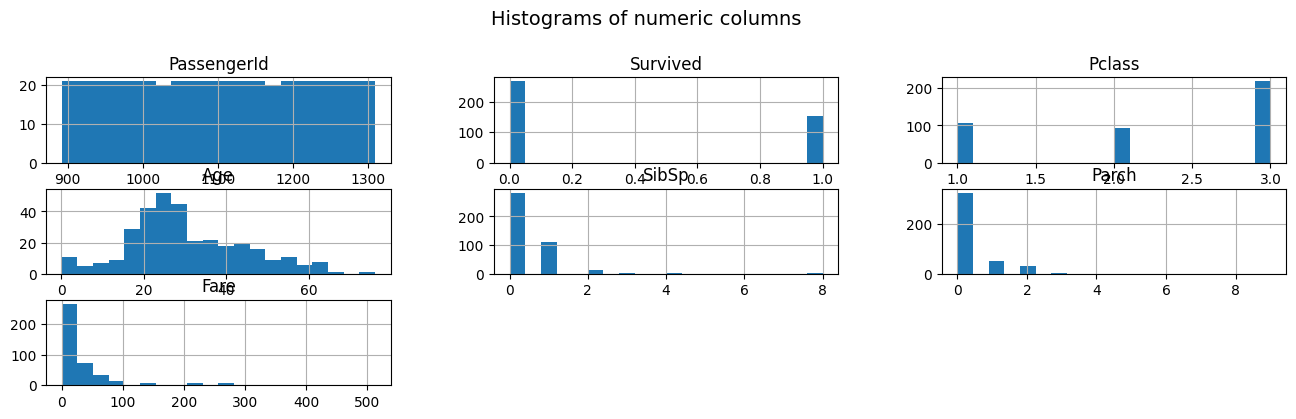

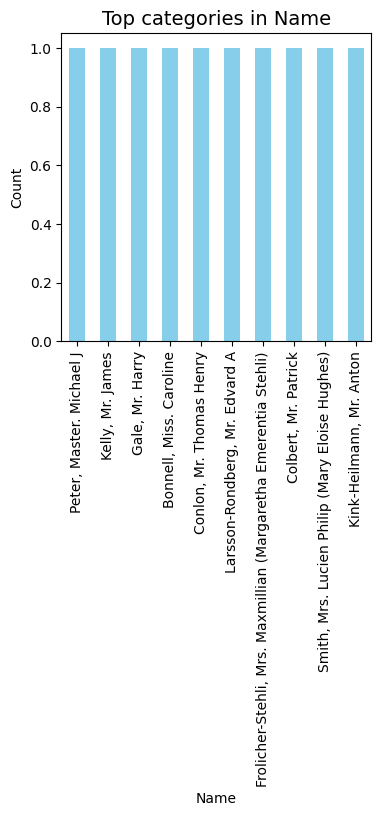

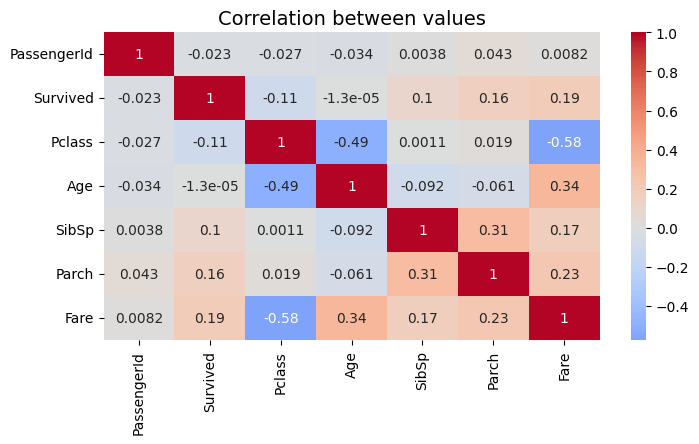

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Query
first_num = df.select_dtypes(include=np.number).columns[0]
print(f"Sample of rows where {first_num} > mean:")
display(df[df[first_num] > df[first_num].mean()].head())

# Visualizations
df.hist(figsize=(16, 4), bins=20)
plt.suptitle("Histograms of numeric columns", y=1.05, fontsize=14)
plt.show()

# Bar chart
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
if cat_cols:
    plt.figure(figsize=(4, 4))
    df[cat_cols[0]].value_counts().head(10).plot(kind="bar", color="skyblue")
    plt.title(f"Top categories in {cat_cols[0]}", fontsize=14)
    plt.xlabel(cat_cols[0])
    plt.ylabel("Count")
    plt.show()

# Correlation heatmap
num_cols = df.select_dtypes(include=np.number).columns.tolist()
if len(num_cols) > 1:
    plt.figure(figsize=(8, 4))
    sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation between values", fontsize=14)
    plt.show()

In [ ]:
# Nulls
print("Missing values per column:")
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts)

print("\nPercentage of null values:")
display((df.isna().mean()*100).round(2).sort_values(ascending=False))

# Duplicates
dup_rows = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {dup_rows}")

print("\nTotal missing values in dataset:", df.isna().sum().sum())

Missing values per column:


,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0



Percentage of null values:


,0
Cabin,78.23
Age,20.57
Fare,0.24
PassengerId,0.00
Name,0.00
Pclass,0.00
Survived,0.00
Sex,0.00
Parch,0.00
SibSp,0.00



Number of duplicated rows: 0

Total missing values in dataset: 414


## Data Preparation

1. **Select data** - choose relevant data columns.
2. **Clean data** – handle the missing values and drop duplicates.
3. **Construct data** – create new features or derivate something if needed.
4. **Integrate data** – just a short example how to combine multiple data sources.
5. **Format data** – adjust datatypes and formats.

In [ ]:
df_prep = df.copy()

print("Columns selected:")
print(df_prep.columns.tolist())

Columns selected:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
for col in df_prep.columns:
    if df_prep[col].dtype in ["float64", "int64"]:
        df_prep[col] = df_prep[col].fillna(df_prep[col].mean())
    else:
        df_prep[col] = df_prep[col].fillna(df_prep[col].mode()[0])

# Drop duplicates in the process
df_prep = df_prep.drop_duplicates()

print("After cleaning, we have:", df_prep.shape)

After cleaning, we have: (418, 12)


In [ ]:
num_cols = df_prep.select_dtypes(include=np.number).columns.tolist()

if num_cols:
    new_col = num_cols[0] + "_squared"
    df_prep[new_col] = df_prep[num_cols[0]] ** 2
    print(f"New feature created: {new_col}") # Just as an example

New feature created: PassengerId_squared


In [ ]:
df_integrated = df_prep.merge(df_prep, on=df_prep.columns[0], how="inner")
print("Integration with another dataset example done.")

Integration with another dataset example done.


In [ ]:
cat_cols = df_prep.select_dtypes(exclude=np.number).columns.tolist()

for col in cat_cols:
    df_prep[col] = df_prep[col].astype("category")

print("Revised data types after formatting:")
print(df_prep.dtypes)

Revised data types after formatting:
PassengerId               int64
Survived                  int64
Pclass                    int64
Name                   category
Sex                    category
Age                     float64
SibSp                     int64
Parch                     int64
Ticket                 category
Fare                    float64
Cabin                  category
Embarked               category
PassengerId_squared       int64
dtype: object


## Modeling

1. **Select modeling techniques** – choose an algorithm to use.
2. **Generate test design** – split the dataset for testing purposes.
3. **Build model** – train the model with the training dataset.
4. **Assess model** – evaluate performance on the test dataset.

In [ ]:
# We will use the standard Python Lib for ML - sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Pick the last column as example
target_col = df_prep.columns[-1]
y = df_prep[target_col]

# We will use just the numeric values
# applying a filter jsut for numeric columns
X = df_prep.select_dtypes(include=["int64", "float64"])

print("Selected target:", target_col)
print("Number of numeric features:", X.shape[1])

Selected target: PassengerId_squared
Number of numeric features: 8


In [ ]:
# Apply the Pareto Principle (80/20 rule) on the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (334, 8)
Test set: (84, 8)


In [ ]:
#Now just building a simple model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#Predict
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) #MSE stands for Mean Squarred Error, differences between predictions and actual values
r2 = r2_score(y_test, y_pred) #Coefficient of Determination, where 1 means right fit, R2 = 0 means no predictive

print("Model performance on test dataset:")
print("MSE:", mse)
print("R²:", r2)

Model performance on test dataset:
MSE: 8.728472846944314e-20
R²: 1.0


## Evaluation

1. **Evaluate results** – check if the model meets the deffined goals.
2. **Review process** – summarize what was done and identify issues.
3. **Determine next steps** – decide if we should deploy, iterate or collect more data for the exercise.

In [ ]:
print("Model Evaluation")
print("------------------------")
print("Mean Squared Error (MSE):", mse)
print("R2 (Coefficient of Determination):", r2)

# Interpretation of the evaluation
# If > 0.7 is a strong model, if between 0.4 and 0.7 is moderate, if less than < 0.4 is weak
if r2 > 0.7:
    print("The model explains most of the variance.")
elif r2 > 0.4:
    print("The model has moderate performance, may need some atention by perform some adjustments or improvements on the it.")
else:
    print("The model has poor performance, the goals may not be achieved.")

Model Evaluation
------------------------
Mean Squared Error (MSE): 8.728472846944314e-20
R2 (Coefficient of Determination): 1.0
The model explains most of the variance.


### Review Process
- We prepared the data, trained a simple linear regression model and evaluated it.
- The results show that the model has some predictive utility but may need some adjustments and improvements.

### As Next Steps
- We may try an alternative algorithms, such as Decision Trees.
- Perform feature engineering or collect more data for teh trial.
- If performance is accepted we must prepare the deployment on next phase.

## Deployment

1. **Plan deployment** – this is how the model results can be delivered.
2. **Plan monitoring and maintenance** – ensure the model remains reliable over time.
3. **Produce final report** – summarize all the findings for business stakeholders.
4. **Review project** – as a retrospective, reflect on what worked well and what could be improved.

In [ ]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results.to_csv("model_predictions.csv", index=False)
print("Data predictions exported to model_predictions.csv")

Data predictions exported to model_predictions.csv


In [ ]:
from google.colab import files
files.download("model_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Final Report
- The micro-project followed the CRISP-DM methodology from business understanding to deployment.  
- A simple Linear Regression model was trained and evaluated.  
- Results showed that the model achieved an R² score of 1.0 (perfect explanatory power).  
- The exported predictions can be used to support decision-making.  

### Monitoring and Future Maintenance
- Continuously monitor the model’s performance.  
- Re-train with new data if performance decreases.  
- Document any changes directly in the notebook cells or in a separate report to ensure reproducibility.  

### Project Review
- **What went well:** The structured approach and clear implementation of CRISP-DM.  
- **What could be improved:** Although not necessary for this micro-project, future work could involve testing more advanced models and performing deeper exploratory analysis.  

---
---
# Switching to Portuguese now, to solve the Titanic exercises
---
---

#Parte 2
##Ficha 1 - Titanic Dataset

Nesta parte vamos aplicar os princípios da **Tomada de Decisão Baseada em Dados (DDDM)** ao conjunto de dados disponíveis no Kaggle relativos ao Titanic, explorando variáveis básicas para compreender padrões
associados à sobrevivência dos passageiros.

####Módulo 1: Fundamentos da Cultura Orientada aos Dados

In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregamento do dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)

print("Dataset Titanic carregado com sucesso.")

Dataset Titanic carregado com sucesso.


In [ ]:
# Mostra as primeiras 5 linhas
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Verifica o nr de linhas e o nr de colunas
print("Dimensão do dataset (linhas, colunas):", df_titanic.shape)

Dimensão do dataset (linhas, colunas): (891, 12)


##### Definição do Problema

Este microprojeto aplica os princípios da **Tomada de Decisão Baseada em Dados (DDDM)** ao conjunto de dados do Titanic.  
O objetivo é utilizar os dados para obter evidências quantitativas e visuais que permitam identificar fatores demográficos e de viagem associados à probabilidade de sobrevivência dos passageiros.  
Nesta fase, iremos realizar uma análise exploratória focada na relação entre o sexo e a sobrevivência, partindo da hipótese, amplamente reconhecida, de que a taxa de sobrevivência diferiu entre homens e mulheres.  
Para tal, recorreremos a tabelas e representações gráficas que permitam ilustrar e confirmar esta relação.

Sobreviventes por sexo:
Survived    0    1
Sex               
Homens    468  109
Mulheres   81  233

Percentagem de sobreviventes por sexo:
Survived      0      1
Sex                   
Homens    81.11  18.89
Mulheres  25.80  74.20


/tmp/ipython-input-3504891906.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sexo_mask, y=df_titanic['Survived'],


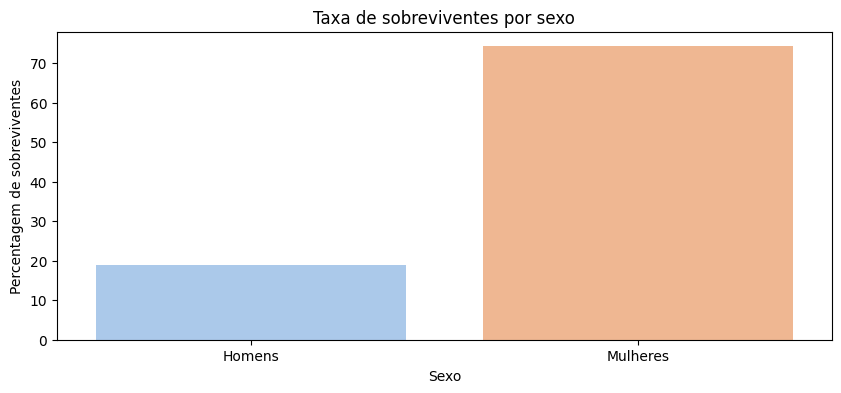

In [ ]:
# Aplicacao de uma mascara para traduzir valores de 'Sex' para Potugues
sexo_mask = df_titanic['Sex'].map({'male': 'Homens', 'female': 'Mulheres'})

# Tabela de sobreviventes por sexo
tabela_sexo = pd.crosstab(sexo_mask, df_titanic['Survived'])
print("Sobreviventes por sexo:")
print(tabela_sexo)

# Percentagens
tabela_percent = pd.crosstab(sexo_mask, df_titanic['Survived'], normalize='index') * 100
print("\nPercentagem de sobreviventes por sexo:")
print(tabela_percent.round(2))

# Grafico
plt.figure(figsize=(10,4))
sns.barplot(x=sexo_mask, y=df_titanic['Survived'],
            estimator=lambda x: sum(x)/len(x)*100, errorbar=None, palette="pastel")
plt.title("Taxa de sobreviventes por sexo")
plt.ylabel("Percentagem de sobreviventes")
plt.xlabel("Sexo")
plt.show()

##### Conclusão da Análise do Módulo 1
- Carregámos o dataset Titanic a partir de um ficheiro CSV alojado no Kaggle
- Foi efeita uma primeira inspeção com `.head()`, `.shape` e `.info()`, para confirmar a estrututa que tem 891 linhas (nr de passageiros) e 12 colunas.  
- Usámos `.describe()` para obter estatísticas descritivas iniciais das variáveis, por exemplo da média da idade ≈ 29.7 anos.  

Este módulo corresponde ao **Data Understanding** na metodologia CRISP-DM e oferece uma visão geral antes de aplicar técnicas de limpeza e preparação.

------
------
####Módulo 2: Preparação de Dados

#####Perfil Inicial dos Dados
A preparação de dados é essencial para garantir a qualidade, a fiabilidade e a integração dos dados.  
Vamos aplicar neste módulo:
**Data Profiling**: `df_titanic.info()`, `df_titanic.describe()`, `df_titanic.isnull().sum()` para identificar fahas na estrutura ou outros problemas.
**Limpeza de dados**: remoção de colunas irrelevantes, imputação/ remoção de valores em falta e eliminação de duplicados.


In [ ]:
# perfil inicial dos dados
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# quantificação de valores em falta
missing_values = df_titanic.isnull().sum()
missing_percent = (df_titanic.isnull().mean() * 100).round(2)

print("Valores em falta por cada coluna:")
print(missing_values)

print("\nPercentagem de valores em falta por coluna:")
print(missing_percent)

Valores em falta por cada coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentagem de valores em falta por coluna:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [ ]:
# estratégia pra remover coluna Cabin e atribuir valores para os nulos na coluna Age
# remover a coluna [Cabin]
df_titanic = df_titanic.drop(columns=['Cabin'])

# preencher valores em nulos da coluna 'Age' com uma mediana
mediana_idade = df_titanic['Age'].median()
df_titanic['Age'] = df_titanic['Age'].fillna(mediana_idade)

print("Valor da mediana da idade utilizado:", mediana_idade)

Valor da mediana da idade utilizado: 28.0


In [ ]:
# tratamento dos dados da coluna Embarked
# remove linhas com valores em falta na coluna 'Embarked'
df_titanic = df_titanic.dropna(subset=['Embarked'])

print("Linhas removidas com Embarked a nulo.")

Linhas removidas com Embarked a nulo.


In [ ]:
# verificação e remoção dos duplicados encontrados
# verifica o nr de linhas duplicadas
duplicados = df_titanic.duplicated().sum()
print("Número de linhas duplicadas:", duplicados)
print("Shape antes:", df_titanic.shape)

# remove os duplicados existentes
df_titanic = df_titanic.drop_duplicates()
print("Shape antes:", df_titanic.shape)

# verificar output
df_titanic.info()

Número de linhas duplicadas: 0
Shape antes: (889, 11)
Shape antes: (889, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


##### Conclusão da Análise do Módulo 2
- O dataset Titanic apresentava valores em falta nas colunas *Age*, *Cabin* e *Embarked*.  
- A coluna *Cabin* foi removida devido à elevada percentagem de valores nulos, que comprometia a sua utilidade analítica.  
- A coluna *Age* foi imputada com a mediana, opção mais robusta do que a média perante outliers.  
- Foram removidas duas linhas com valores nulos em *Embarked*, representando um impacto residual sobre o dataset.  
- Foram também eliminados registos duplicados, de forma a evitar distorções nas análises subsequentes.  

Após estas etapas, o dataset encontra-se **limpo, consistente e preparado** para análises exploratórias e modelação.


------
------
#### Módulo 3: Análise Exploratória de Dados (AED)

Neste módulo, vamos aplicar os princípios da **Análise Exploratória de Dados (AED)**,
que é uma das fases mais importantes do processo analítico. Aqui é objetivo compreender padrões, distribuições e relações entre variáveis antes de avançarmos para a modelação.  
Serão abordados conceitos estatísticos fundamentais (média, mediana, moda, amplitude), a escolha de gráficos e a interpretação da visualização dos mesmos.

#####1. Estatística Descritiva

In [ ]:
# Dados relativos às 7 pessoas
idades = [22, 25, 25, 28, 32, 35, 57]

# a) Média
media = sum(idades) / len(idades)

# b) Mediana
idades_ordenadas = sorted(idades)
n = len(idades_ordenadas)
if n % 2 == 0:
    mediana = (idades_ordenadas[n//2 - 1] + idades_ordenadas[n//2]) / 2
else:
    mediana = idades_ordenadas[n//2]

# c) Moda
from statistics import mode
moda = mode(idades)

# d) Amplitude
amplitude = max(idades) - min(idades)

print(f"Média é: {media:.2f}")
print(f"Mediana é: {mediana}")
print(f"Moda é: {moda}")
print(f"Amplitude é: {amplitude}")

Média é: 32.00
Mediana é: 28
Moda é: 25
Amplitude é: 35


A média, que apresenta valor 32, é superior à mediana, apresenta valor de 28, porque o valor 57 é um outlier, ou seja, muito superior às restantes idades, o que faz puxar a média para cima.
Já a amplitude apresenta o valor de 35, e a moda é 25.


#####2. Seleção de Gráficos

a) Para *visualizar a distribuição das notas de um exame* o recomendado será usar um **Histograma**, pois  mostra a frequência de notas dentro de intervalos, com uma distribuição contínua.

b) Para *comparar o total de vendas entre quatro filiais* o recomendado será usar um **Gráfico de Barras**, pois é ideal para comparar categorias, por exemplo, neste caso aplicado a filiais.

c) Para *investigar a relação entre altura e peso* o recomendado será usar um **Gráfico de Dispersão (*Scatter Plot*)**, pois permite observar correlações entre duas variáveis numéricas.

#####3. Princípios da Visualização

***Use Case***:
"Um gráfico de pizza 3D com 15 fatias, cada uma de uma cor diferente e brilhante, mostrando a quota de mercado de 15 empresas concorrentes. As legendas estão listadas ao lado do gráfico."

**Violações dos princípios**:
1. *Demasiadas categorias* - Apresentar 15 fatias, o que dificulta a sua leitura e comparação.  
2. *Uso de 3D* - distorce as proporções visuais e certamente confunde o utiliador.  
3. *Cores excessivas e brilhantes* - isto irá causar distração e redução de clareza na interpretação.  
4. *Legendas afastadas do gráfico* - irá obrigar o utilizador a mover/ desviar constantemente o olhar.

**Alternativa recomendada**:
*Gráfico de Barras Horizontais*, por ser mais claro, legível e permitir comparar facilmente as quotas de mercado.


#####4. Análise Univariada vs. Bivariada

- **Análise Univariada:** Analisa uma única variável.  
Exemplo: “Qual é a distribuição dos preços das casas?” - um histograma do *Preço*.  

- **Análise Bivariada:** Examina a relação entre duas variáveis.  
Exemplo: “Existe relação entre o preço e a área de uma casa?” - um gráfico de dispersão *Preço vs Área*. Esta permite observar padrões, correlações e tendências.

#####5. Interpretação de um Box Plot

***Use Case***: *O box plot para o nível "Sénior" tem uma "caixa" (o intervalo interquartil) muito mais longa do que o do nível "Júnior". Além disso, o box plot "Sénior" tem vários pontos acima do "bigode" superior.*

Retiramos que o box plot dos salários de profissionais **Sénior** apresenta:
- Uma caixa (intervalo interquartil) muito mais longa.
- Vários pontos acima do "bigode" superior.

**Interpretação**:
- A maior caixa indica que os salários dos seniores têm maior dispersão.  
- Os outliers acima do bigode, mostram que existem profissionais com salários muito superiores à média.  
- Por outro lado, isto contrasta com o facto dos juniores terem uma distribuição mais homogénea e concentrada.

Concluímos que há maior desigualdade e amplitude salarial entre profissionais seniores.

##### Conclusão da Análise do Módulo 3
- Foram calculadas medidas estatísticas (média, mediana, moda e amplitude) para uma pequena amostra de dados, onde foi destacada a influência de outliers.  
- Identificámos a importância de escolher gráficos adequados à natureza dos dados (histogramas, barras, dispersão).  
- Analisamos princípios de visualização que promovem clareza e precisão.  
- Vimos a diferenciação entre análises univariadas e bivariadas, dando exemplo para a sua aplicação prática.  
- Interpretámos box plots como ferramentas eficazes para identificar dispersão e valores extremos.

Este módulo reforça as bases da **Análise Exploratória de Dados (AED)**, como sendo uma etapa essencial da metodologia CRISP-DM, permitindo compreender padrões e relações, antes de qualquer modelação estatística.

------
------
#### Módulo 4: Técnicas Analíticas para Extração de Insights

Neste módulo vamos abordar técnicas e princípios analíticos utilizados para a **extração de insights** a partir dos dados.  
Pretendemos compreender relações, identificar causas, priorizar problemas e segmentar comportamentos, de modo a transformar a análise em informação útil para a decisão.  
Vamos aplicar conceitos, tais como, **Correlação vs. Causalidade**, **Análise de Pareto**, **Diagrama de Ishikawa**, **Segmentação de Dados** e **Séries Temporais**.

#####1. Correlação vs. Causalidade

***Use Case***:
Um estudo observa que as cidades com um maior número de igrejas também tendem a ter uma taxa de criminalidade mais elevada.  
Isto não significa que “igrejas causam crime”.

Explicação:
Este é um exemplo de **correlação espúria**, em que duas variáveis aparentam estar relacionadas, mas são ambas influenciadas por uma variável de confusão.

Variável de confusão provável:
Tamanho da População

Cidades maiores tendem naturalmente a ter:
- Mais igrejas, pois têm maior número de habitantes religiosos.
- Mais crimes, pois têm maior densidade populacional e situação propícia a delitos.

Assim, a explicação é relativa não ao número de igrejas, mas sim a dimensão da população.

#####2. Análise de Pareto

In [ ]:
# Nr de queixas dos clientes
problemas = {
    "Atraso na entrega": 120,
    "Produto errado": 45,
    "Website lento": 25,
    "Problemas de pagamento": 8,
    "Outros": 2
}

# Ordena por frequencia
import pandas as pd
df_pareto = pd.DataFrame(list(problemas.items()), columns=["Causa", "Queixas"]).sort_values(by="Queixas", ascending=False)

# Calcula percentagens e Percentagem acumulada
df_pareto["Percentagem"] = (df_pareto["Queixas"] / df_pareto["Queixas"].sum()) * 100
df_pareto["Percentagem Acumulada"] = df_pareto["Percentagem"].cumsum()

print(df_pareto)

                    Causa  Queixas  Percentagem  Percentagem Acumulada
0       Atraso na entrega      120         60.0                   60.0
1          Produto errado       45         22.5                   82.5
2           Website lento       25         12.5                   95.0
3  Problemas de pagamento        8          4.0                   99.0
4                  Outros        2          1.0                  100.0


Segundo o Princípio de Pareto (80/20), cerca de 80% dos efeitos vêm de 20% das causas.
No exemplo aplicado, o *Atraso na entrega* e o *Produto errado* somam cerca de 82.5% das queixas totais.
Assim, estas representam as “poucas causas vitais” que devem ser priorizadas pela equipa para reduzir a maioria dos problemas.

#####3. Diagrama de Ishikawa

***Use Case***: “Atrasos na entrega de novas funcionalidades”

| Categoria     | Possível Causa |
|----------------|----------------|
| **Mão de obra** | Falta de developers experientes para as tarefas críticas |
| **Máquinas** | Infraestrutura com servidores lentos |
| **Métodos** | Fraco planeamento e Ausência de metodologia ágil |
| **Meio Ambiente** | Comunicação inificiente entre equipas |

O Diagrama de Ishikawa ajuda a estruturar a análise das causas para identificar onde devenos atuar primeiro.

#####4. Segmentação de Dados

***Use Case***:
Uma empresa de streaming de música quer criar planos de subscrição personalizados.

Estratégia de Segmentação Comportamental:
Os utilizadores podem ser agrupados com base em padrões de uso e preferências musicais.

| Segmento | Critérios Comportamentais | Descrição |
|-----------|---------------------------|------------|
| **Ouvinte Casual** | Ouvem pouco tempo por mês e usa a versão gratuita | Utiliza o serviço de forma esporádica |
| **Super Fã** | Ouve música todo dia durante o mês, tem playlists e subscrição premium | Cliente fidelizado com grande potencial de retenção |
| **Explorador de Géneros** | Ouve uma grande diversidade de estilos e artistas musicais | Parece estar sempre interessado em  descobrir músicas novas |


A segmentação permite personalizar campanhas e recomendações musicais, maximizando a satisfação e fidelização junto dos clientes.

#####5. Análise de Séries Temporais

***Use Case***
Ao analisar um gráfico de vendas mensais de uma loja de vestuário ao longo de cinco anos, observam-se dois padrões distintos:
1. Um aumento geral e gradual nas vendas de ano para ano.
2. Picos regulares em junho/ julho e dezembro.

Interpretação:
- Tendência: o aumento generalizado ao longo do tempo indica crescimento sustentado das vendas.  
- Sazonalidade: os picos anuais refletem padrões cíclicos, como época balnear e Natal.  
- Ruído: pequenas flutuações imprevisíveis sem padrão definido.  

A analise destas componentes permite-nos compreender padrões estruturais e eventos pontuais.

##### Conclusão da Análise do Módulo 4
- Exploramos o conceito de **correlação espúria**, reforçando a importância de identificar as variáveis de confusão antes de tirar conclusões causais.  
- Aplicamos o **Princípio de Pareto**, demonstrando como focar nas “poucas causas vitais” pode resolver parte ou a maioria dos problemas.  
- Com uso do **Diagrama de Ishikawa** estruturamos a análise de causas complexas.  
- Vimos a **segmentação comportamental** como técnica de personalização e tomada de decisão estratégica.  
- Compreendemos os **componentes de uma série temporal**, ou seja, distinguindo tendências, sazonalidade e ruído nas análises.  

Este módulo consolida a fase de **Evaluation** da metodologia CRISP-DM, transformando dados em conhecimento prático e acionável para a tomada de decisão.

------
------
#### Módulo 5: Comunicar Insights e Decidir com Dados

Esta é a fase final do ciclo analítico: comunicar resultados e apoiar decisões com base em evidências encontradas.  
A **comunicação de insights** é o ponto onde a análise se transforma em ação, e onde a clareza, o *storytelling* e o design desempenham um papel essencial.  
Este módulo aborda cinco dimensões práticas da tomada de decisão baseada em dados:  
- Storytelling com Dados  
- Design de Dashboards  
- Análise de Risco vs. Certeza  
- Cultura Organizacional de Dados  
- Comunicação de Resultados

#####1. Storytelling com Dados

Cenário:
Foi identificado um insight crucial: 75% dos novos utilizadores desistem do jogo no Nível 5,
onde ocorre um pico súbito de dificuldade.  
A apresentação à equipa de design deve seguir as quatro fases seguintes:
1. Contexto:
"Desde o lançamento, observámos um forte crescimento de novos jogadores, mas também um elevado abandono nas primeiras fases."
2. Conflito / Questão:  
"Os dados mostram uma quebra abrupta no envolvimento dos jogadores no Nível 5.
Isto levantou a questão: O que será que está a causar esta desistência massiva?"
3. Descoberta / Clímax:  
"A análise realizada, revelou que o Nível 5 tem um aumento acentuado do nível de dificuldade e um tempo médio de falhas três vezes superior aos níveis inferiores."
4. Recomendação / Resolução:
"Propomos aplicar um ajuste na curva de dificuldade do Nível 5 e adicionar um tutorial opcional para ajudar os jogadores.  
Após esta alteração ser aplicada, podemos medir o impacto na taxa de retenção de novos jogadores."

O storytelling, aqui traduz dados em ação, gerando empatia e mobilizando as equipas para uma rápida resolução.

#####2. Design de Dashboards

***Use Case***:
Um gestor pede para incluir:
- 25 KPIs num único dashboard  
- Fundo com uma imagem da empresa  
- Gráficos 3D "porque parecem mais modernos"

Resposta com fundamentos:
1. Demasiados KPIs (25):  
ISto reduz o foco e a clareza da interpretação.  
Um bom dashboard segue o princípio de "menos é mais", focando-se nos indicadores críticos, que por norma são recomendados 3 a 7 métricas principais num dashboard.

2. Imagem de fundo:
Estas imagens irão distrair e prejudicar a legibilidade dos dados.  
O design deve priorizar sempre um bom contraste e simplicidade, sendo recomendado aplicação de um fundo neutro.

3. Gráficos 3D:
Distorcem perceções visuais e dificultam a leitura de valores durante a sua análise.  
A simplicidade e precisão devem prevalecer sobre o aspeto estético.

Um dashboard eficaz na mensagem que quer comunicar é limpo, orientado à ação e intuitivo, longe do pensamento de ter de ser elemento decorativo.

#####3. Processo de Decisão: Risco vs. Certeza

Cenários:

**A**. Campanha de Marketing Digital
- Investimento: 50.000€
- Resultado possível 1: +100.000€ (70% de probabilidade)
- Resultado possível 2: +20.000€ (30% de probabilidade)

**B**. Redesign do Website
- Investimento: 50.000€
- Resultado garantido: +60.000€

Análise:
- A alternativa **A** envolve risco, pois os resultados dependem de probabilidades.
- A alternativa **B** oferece certeza, com retorno previsível.

Valor esperado da A:
(0.7 × 100.000) + (0.3 × 20.000) = **76.000 €**

Apesar de ter um valor superior, a opção **A** é mais arriscada.  
A **decisão mais conservadora** seria a **B**, privilegiando a previsibilidade sobre a incerteza.

#####4. Cultura de Dados

Contexto:
Sendo o único analista de dados numa pequena empresa onde a maioria das decisões é tomada com base na intuição dos gestores seniores. Pretende atuar como um "agente de mudança" para promover uma cultura mais orientada por dados.

Estratégia:
1. Criar relatórios simples para apoio na análise, por exemplo vendas semanais ou métricas de clientes, que apresentem valor imediato da análise.

2. Literacia de dados, aqui é um problema, mas partilhar dashboards intuitivos e ir promovendo workshops curtos internamente, mostrando como os dados sustentam melhores decisões.

Devido a vários factores, como perfis não técnicos, resistência à mudança, falta de conhecimento em  análise de dados, o objetivo é mostrar valor antes de avançar com a mudança, criando confiança dos utilizadores e despertando curiosidade pela tomada de decisão orientada por dados.

######5. Comunicação de Resultados

***Use Case***:
Um membro da audiência pergunta: ""O seu modelo tem um R-quadrado de 0.78. O que é que isso significa em termos simples?"

Explicação simples:
"Pense no R2 como sendo a percentagem de explicação que o nosso modelo oferece.
Um R2 de 0.78 significa que o modelo explica 78% da variação observada nos resultados - é como se dissessemos que 78% da história é compreendida pelos nossos dados e o restante 22% é ruído, fatores externos ou imprevisíveis."

As analogias ajudam a tornar conceitos técnicos acessíveis sem perder rigor na explicação.

##### Conclusão da Análise do Módulo 5
- O storytelling transforma resultados analíticos em narrativas compreensíveis e motivadoras.

- O design de dashboards deve equilibrar clareza e fácil leitura visual, bem como relevância informacional.

- A análise de risco vs. certeza acaba por reforçar a importância de quantificar incertezas antes de uma decidisão.

- Promover uma cultura de dados comçea por ser um desafio, onde com pequenas ações de conquista e exemplos práticos para conseguir ganhos futuros com a sua implementação e utilização.  

- Uma comunicação eficaz acaba por ser aquela que é capaz de traduzir métricas complexas em linguagem simples e analogias visuais.  

Este módulo 5 encerra o ciclo do CRISP-DM, mostrando que o valor da análise de dados surge quando o conhecimento é comunicado, compreendido e aplicado à decisão.